In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

## Data importing

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Data Understanding

In [3]:
dataset.shape

(30, 2)

In [4]:
dataset.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## Data Preperation

In [6]:
dataset=dataset.rename({'YearsExperience':'year_exp', 'Salary':'salary'},axis=1)
dataset

,year_exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Data Visualiasation

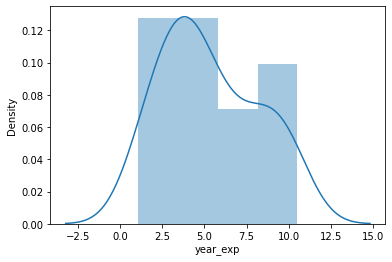

In [7]:
sns.distplot(dataset['year_exp'])
plt.show()

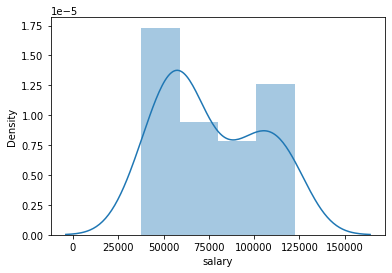

In [8]:
sns.distplot(dataset['salary'])
plt.show()

In [9]:
dataset.corr()

,year_exp,salary
year_exp,1.000000,0.978242
salary,0.978242,1.000000


<AxesSubplot:xlabel='year_exp', ylabel='salary'>

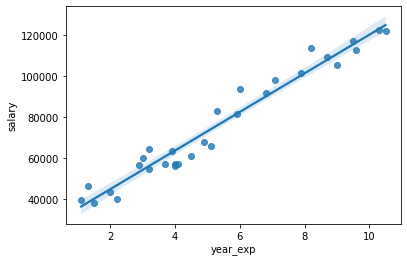

In [10]:
sns.regplot(x=dataset['year_exp'],y=dataset['salary'])

## Model Building

In [11]:
model=smf.ols("year_exp~salary",data=dataset).fit()

## Model Testing

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               year_exp   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        12:44:02   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Square Root transformation on data

In [13]:
model1 = smf.ols('np.sqrt(year_exp)~np.sqrt(salary)', data = dataset).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.sqrt(year_exp)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           7.58e-19
Time:                        12:44:02   Log-Likelihood:                 14.149
No. Observations:                  30   AIC:                            -24.30
Df Residuals:                      28   BIC:                            -21.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1612      0.161     -7.208      0.000      -1.491      -0.831
np.sqrt(salary)     0.0125      0.001     21.315      0.000       0.011       0.014
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.219
Skew:                          -0.461   Prob(JB):                        0.544
Kurtosis:                       2.646   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Log transformation on Data

In [14]:
model2 = smf.ols('np.log(year_exp)~np.log(salary)', data = dataset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(year_exp)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           7.40e-16
Time:                        12:44:02   Log-Likelihood:                 7.4195
No. Observations:                  30   AIC:                            -10.84
Df Residuals:                      28   BIC:                            -8.037
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -16.4901      1.101    -14.977      0.000     -18.745     -14.235
np.log(salary)     1.6104      0.098     16.353      0.000       1.409       1.812
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.142
Skew:                          -0.840   Prob(JB):                       0.0765
Kurtosis:                       4.136   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Evaluation

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
model1_pred_y =np.square(model1.predict(dataset['salary']))
model2_pred_y =np.exp(model2.predict(dataset['salary']))

In [17]:
model1_rmse =np.sqrt(mean_squared_error(dataset['year_exp'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(dataset['year_exp'], model2_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse)

model= 0.5991950540452539 
model1= 0.5832153569122783 
model2= 0.637775537821841


In [18]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model2_rmse}
min(data, key=data.get)
print("As the Minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use", min(data, key=data.get), "For Predction")

As the Minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model1 For Predction


## Model Predictions

####  Building Prediction Model

In [19]:
predicted = pd.DataFrame()
predicted['salary'] = dataset.salary
predicted['year_exp'] = dataset.year_exp
predicted['Predicted_year_exp'] = pd.DataFrame(np.exp(model1.predict(predicted.salary)))
predicted

,salary,year_exp,Predicted_year_exp
0,39343.0,1.1,3.703614
1,46205.0,1.3,4.554429
2,37731.0,1.5,3.518969
3,43525.0,2.0,4.209298
4,39891.0,2.2,3.767664
5,56642.0,2.9,6.068412
6,60150.0,3.0,6.642653
7,54445.0,3.2,5.726130
8,64445.0,3.2,7.394166
9,57189.0,3.7,6.155684


In [20]:
predicted1 = pd.DataFrame()
predicted1['salary'] = dataset.salary
predicted1['year_exp'] = dataset.year_exp
predicted1['Predicted_year_exp'] = pd.DataFrame(np.exp(model2.predict(predicted.salary)))
predicted1

,salary,year_exp,Predicted_year_exp
0,39343.0,1.1,1.730709
1,46205.0,1.3,2.242167
2,37731.0,1.5,1.617944
3,43525.0,2.0,2.036462
4,39891.0,2.2,1.769696
5,56642.0,2.9,3.112515
6,60150.0,3.0,3.428778
7,54445.0,3.2,2.920404
8,64445.0,3.2,3.831581
9,57189.0,3.7,3.161064


#### Both "R-squared & Log Transformed" Prediction Model For the Salary Hike with given data is Built Successfully.

### As the Minimum RMSE and highest Adjusted R-squared score, We use Square root Model for Prediction.